<a href="https://colab.research.google.com/github/areejakram24/MY_ProjectsandLabs/blob/main/M3L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
### MODULE 3: CLASSIFICATION-1
### LAB-1 : Understanding Distance metrics and Introduction to KNN

---

## **SECTION - 1 : Distance metrics**

In [2]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import math
from scipy.spatial import distance
import matplotlib.pyplot as plt

### **Euclidean Distance**

In [5]:
#method 1
x1 = np.array((1, 2))
x2 = np.array((4, 6))
sumv = 0
for i in range(len(x1)):
  sumv += ((x1[i]-x2[i])**2)
dist = math.sqrt(sumv)
print(dist)

5.0


In [6]:
#vectorized:
euclidean_dist = np.sqrt(np.sum((x1-x2)**2))
print(euclidean_dist)

5.0


In [ ]:
# 3-D Visualization
plotx = np.linspace(-10,10,50)
meshx, meshy = np.meshgrid(plotx,plotx)

In [ ]:
tempeuclid = np.sqrt((meshx**2 + meshy**2))

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=tempeuclid, x=plotx, y=plotx)])
fig.update_layout(title='Euclidean Distance from origin', autosize=False,
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

### **Manhattan Distance**

In [ ]:
manhattan_dist = distance.cityblock(x1, x2)
print(manhattan_dist)

7


In [8]:
manhattan_dist = np.sum(np.abs((x1 - x2)))
print(manhattan_dist)

7


In [ ]:
# 3-D visualization
plotx = np.linspace(-10,10,50)
meshx, meshy = np.meshgrid(plotx,plotx)

In [ ]:
tempmanhattan = np.abs(meshx) + np.abs(meshy)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=tempmanhattan, x=plotx, y=plotx)])
fig.update_layout(title='Manhattan Distance from origin', autosize=False,
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

### **Minkowski Distance**

In [10]:
minkowski_distance = distance.minkowski(x1, x2, p=3)
print(minkowski_distance)

4.497941445275415


In [12]:
minkowski_dist_p1 = distance.minkowski(x1,x2,p=1)
print(" p=1 --> ",minkowski_dist_p1)
minkowski_dist_p2 = distance.minkowski(x1,x2,p=2)
print(" p=2 --> ",minkowski_dist_p2)

 p=1 -->  7.0
 p=2 -->  5.0


### **Hamming Distance**

In [ ]:
str_1 = 'euclidean'
str_2 = 'manhattan'
hamming_dist = distance.hamming(list(str_1), list(str_2)) * len(str_1)
print(hamming_dist)

7.0


### **Cosine Similarity**

In [13]:
from numpy.linalg import norm
cosine_similarity = 1 - distance.cosine(x1,x2)
print(cosine_similarity)

cosine_similarity = np.dot(x1, x2)/(norm(x1)*norm(x2))
print(cosine_similarity)

0.9922778767136677
0.9922778767136677


### **Chebyshev Distance**

In [14]:
chebyshev_distance = distance.chebyshev(x1,x2)
print(chebyshev_distance)

4


### Haversine distance

In [ ]:
def haversine(coord1, coord2):

    # Coordinates in decimal degrees (e.g. 2.89078, 12.79797)
    lon1, lat1 = coord1
    lon2, lat2 = coord2

    R = 6371000  # radius of Earth in meters
    phi_1 = math.radians(lat1)
    phi_2 = math.radians(lat2)

    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2

    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    meters = R * c  # output distance in meters
    km = meters / 1000.0  # output distance in kilometers

    meters = round(meters, 3)
    km = round(km, 3)


    print(f"Distance: " + str(km) + " km")

In [ ]:
haversine([-0.116773, 51.510357], [-77.009003, 38.889931])

Distance: 5897.658 km


In [ ]:
import random
import scipy.stats as ss
from sklearn.neighbors import KNeighborsClassifier

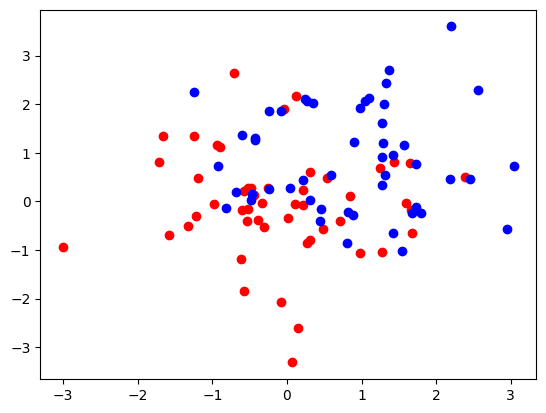

In [ ]:
def generate_synth_data(n = 50):
    points = np.concatenate((ss.norm(0, 1).rvs((n, 2)), ss.norm(1, 1).rvs((n, 2))), axis = 0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)))
    return (points, outcomes)

n = 50
pts,tgts = generate_synth_data(n) #generates 100 points
# print(tgts)
plt.figure()
plt.plot(pts[:n, 0], pts[:n, 1], "ro")
plt.plot(pts[n:, 0], pts[n:, 1], "bo")
plt.show()

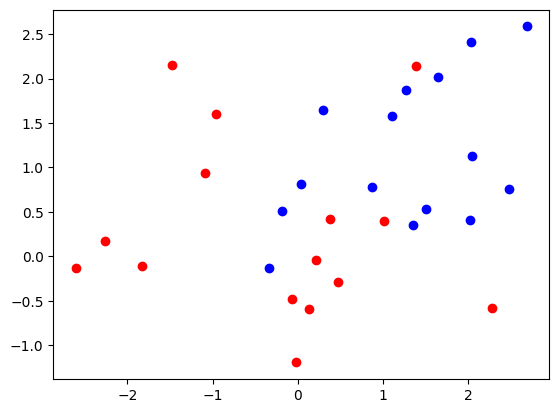

In [ ]:
n = 15
test_pts,test_tgts = generate_synth_data(n)
# print(test_tgts)
plt.figure()
plt.plot(test_pts[:n, 0], test_pts[:n, 1], "ro")
plt.plot(test_pts[n:, 0], test_pts[n:, 1], "bo")
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(pts, tgts)
our_predictions = knn.predict(test_pts)
print("Prediction Accuracy: ")
print(100 * np.mean(our_predictions == test_tgts))

Prediction Accuracy: 
80.0


The Iris flower data set or Fisher's Iris data set is a multivariate data set that consists of 50 samples from each of three species of Iris (*Iris setosa, Iris virginica and Iris versicolor*). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
# data['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
data['target'] = pd.Series(iris.target)
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [ ]:
np.random.seed(123)
indices = np.random.permutation(data.shape[0])
div = int(0.65 * len(indices))
train_idx, test_idx = indices[:div], indices[div:]

train_set, test_set = data.loc[train_idx,:], data.loc[test_idx,:]
test_class = list(test_set.iloc[:,-1])
train_class = list(train_set.iloc[:,-1])

In [ ]:
def dist_euclidean(X1,X2):
    return distance.euclidean(X1,X2)

In [ ]:
def dist_cosine(X1,X2):
    return distance.cosine(X1,X2)

In [ ]:
def dist_manhattan(X1,X2):
    return distance.cityblock(X1,X2)

In [ ]:
def dist_chebyshev(X1,X2):
    return distance.chebyshev(X1,X2)

In [ ]:
metrics_list = [dist_euclidean,dist_cosine, dist_manhattan, dist_chebyshev]
for dist_metric in metrics_list:
  knn = KNeighborsClassifier(n_neighbors = 3, metric=dist_metric)
  knn.fit(train_set, train_class)
  our_predictions = knn.predict(test_set)
  print(dist_metric.__name__)
  print("Prediction Accuracy: ")
  print(100 * np.mean(our_predictions == test_class))
  print()

dist_euclidean
Prediction Accuracy: 
100.0

dist_cosine
Prediction Accuracy: 
100.0

dist_manhattan
Prediction Accuracy: 
100.0

dist_chebyshev
Prediction Accuracy: 
100.0



---
### Questions to Think About and Answer:

1. How are similarity and distance different from each other?  

2. Are there any conditions for a particular distance to be considered a "distance metric"?



1. Disatnce means how apart two points are. If two points have greater distance between them they are said to be dissimilar. If two points have less distance between them they are said to be more similar. By saying two points are similar we mean that they are more alike.
2. Aparently there are few conditions to be considered:
a) distance should not be negative
b) except for same points any two other points can not have distance as zero.
c) distance from point1 to point 2 is same as that from poin2 to point1.
d) shortest distance between two points is a straight line and through the third point it shouldnt be shorter.